In [26]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached flatbuffers-23.5.9-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached jax-0.4.10-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255.)
val_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=train_datagen.flow_from_directory(directory="train_data/train",
                                                      batch_size=60,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))
validation_generator = val_datagen.flow_from_directory(directory="train_data/val",
                                                                batch_size=15,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

Found 6623 images belonging to 8 classes.
Found 1890 images belonging to 8 classes.


In [3]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 2S1
1 : BRDM_2
2 : BTR_60
3 : D7
4 : SLICY
5 : T62
6 : ZIL131
7 : ZSU_23_4


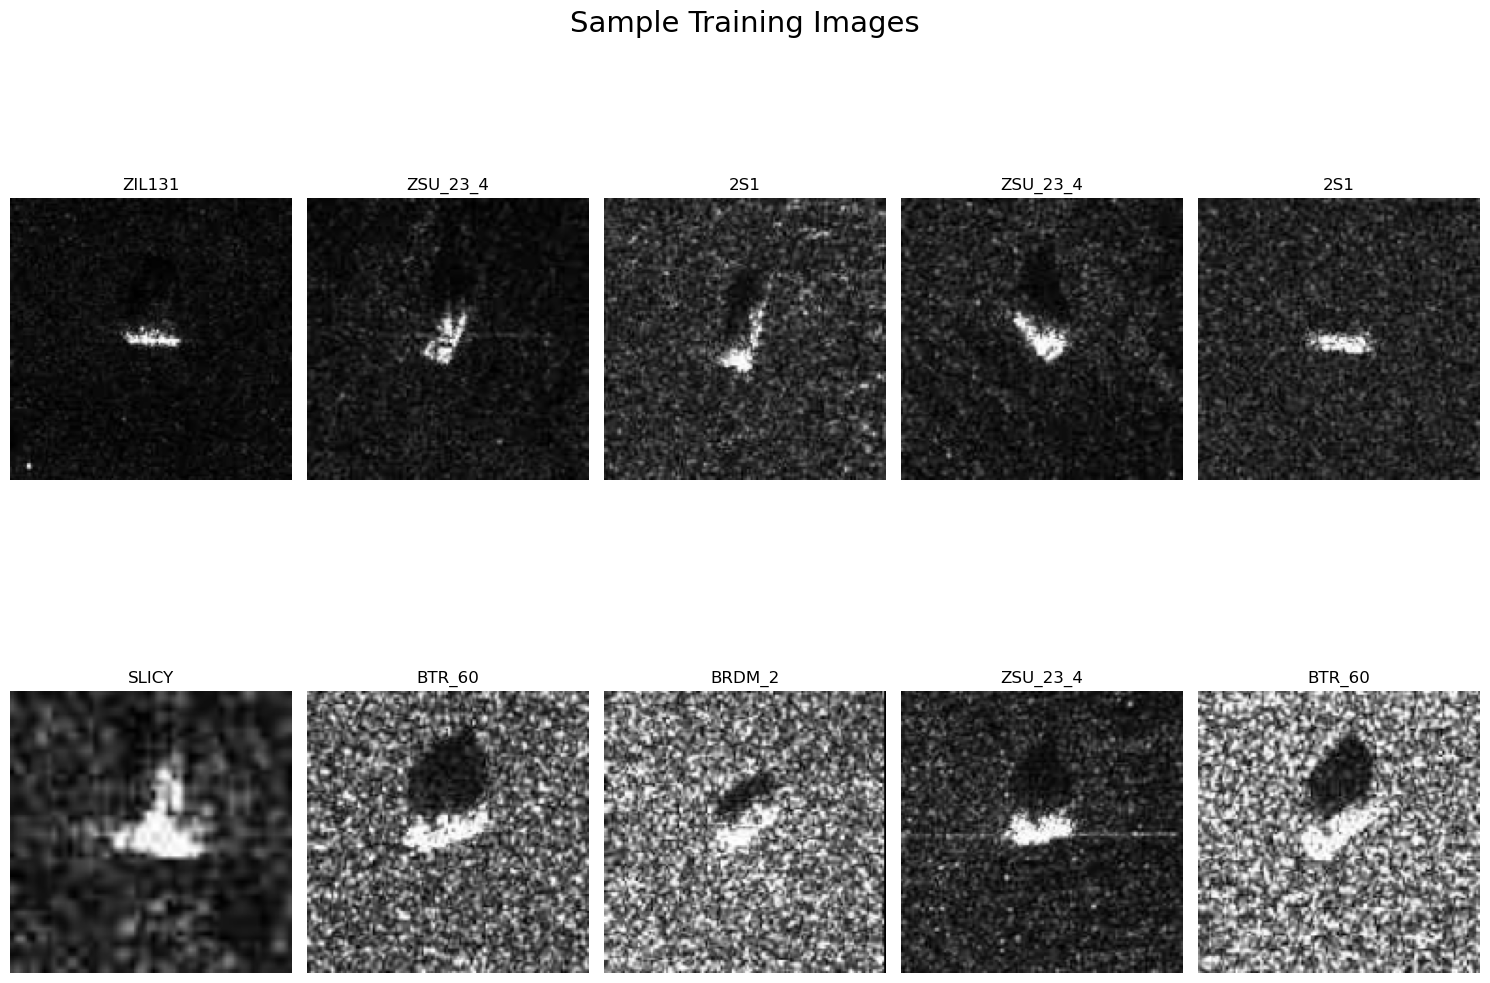

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [5]:
 model = tf.keras.models.Sequential([ 
      
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
     
      tf.keras.layers.Flatten(), 
      
      tf.keras.layers.Dense(512, activation='relu'), 
      
      tf.keras.layers.Dense(8, activation='softmax')
  ])

In [6]:
model.compile(optimizer=tf.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
111/111 [==============================] - 77s 682ms/step - loss: 0.9393 - accuracy: 0.6791 - val_loss: 0.2655 - val_accuracy: 0.9101
Epoch 2/10
111/111 [==============================] - 78s 704ms/step - loss: 0.1593 - accuracy: 0.9592 - val_loss: 0.0386 - val_accuracy: 0.9894
Epoch 3/10
111/111 [==============================] - 86s 775ms/step - loss: 0.0342 - accuracy: 0.9912 - val_loss: 0.0257 - val_accuracy: 0.9947
Epoch 4/10
111/111 [==============================] - 83s 747ms/step - loss: 0.0146 - accuracy: 0.9968 - val_loss: 0.0092 - val_accuracy: 0.9979
Epoch 5/10
111/111 [==============================] - 82s 739ms/step - loss: 0.0045 - accuracy: 0.9995 - val_loss: 0.0076 - val_accuracy: 0.9974
Epoch 6/10
111/111 [==============================] - 79s 714ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0075 - val_accuracy: 0.9968
Epoch 7/10
111/111 [==============================] - 80s 716ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0074 - val_ac

In [10]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


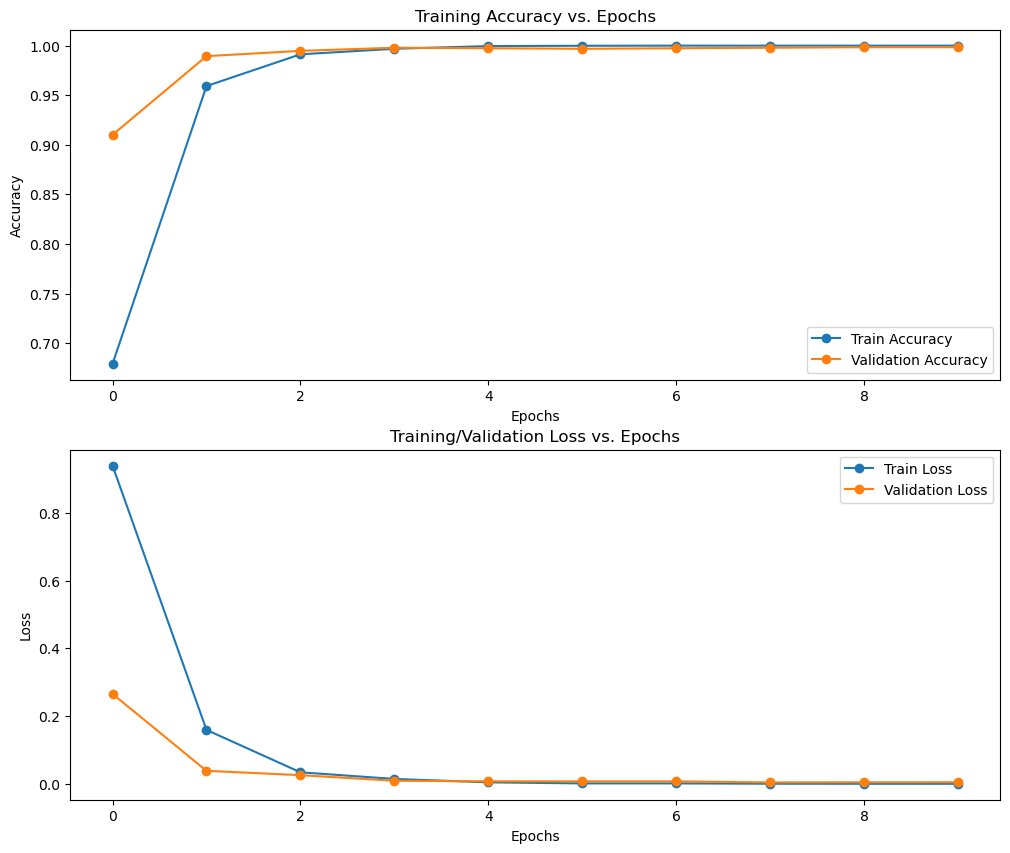

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

In [15]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory('train_data/test',
                                                 shuffle=False,
                                                 batch_size=10,
                                                 target_size = (150,150),
                                                 class_mode='categorical')

Found 953 images belonging to 8 classes.


In [16]:
predictions = model.predict(test_generator)

96/96 [==============================] - 8s 80ms/step


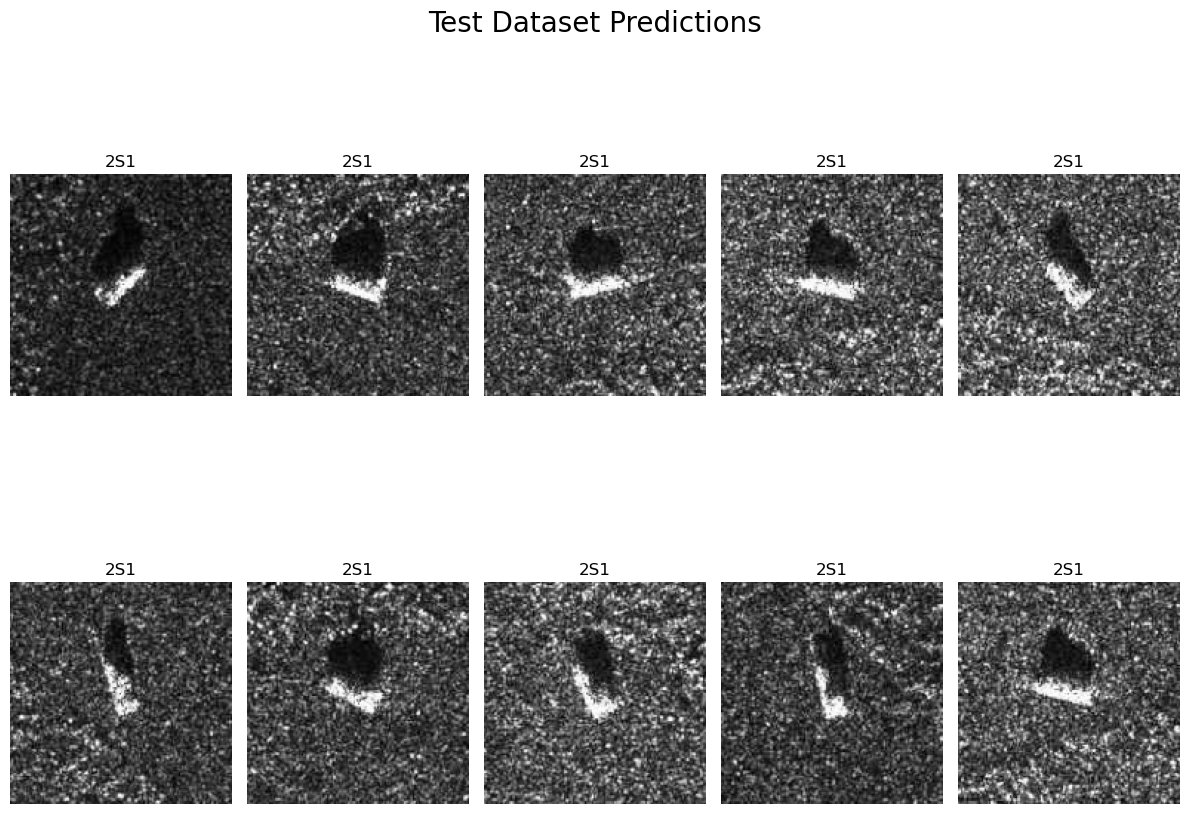

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [43]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=10)

96/96 [==============================] - 4s 38ms/step - loss: 0.0028 - accuracy: 0.9979


In [44]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.0028032930567860603
Test Accuracy: 0.9979013800621033


In [18]:
!pip install Pillow

In [97]:
from tensorflow.keras.preprocessing import image
!pip install opencv-python

In [129]:
import cv2
img_path="train_data/test/ZSU_23_4/HB19996.JPG"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)

img_batch = np.expand_dims(img_array, axis=0)
img1 = cv2.imread(img_path)
output = cv2.resize(img1, (150,150))
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)





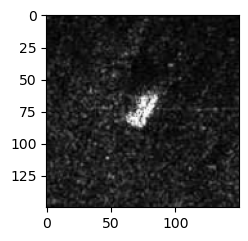

1/1 [==============================] - 0s 25ms/step
ZU_23_4


In [132]:

plt.figure(figsize=(2.5,2.5))
plt.imshow(output)
plt.show()
predicted=model.predict(img_batch)
for i in range(8):
    if predicted[0][0]==True:
        print("2S1")
        break
    elif predicted[0][1]==True:
        print("BRDM_2")
        break
    elif predicted[0][2]==True:
        print("BIR_60")
        break
    elif predicted[0][3]==True:
        print("D7")
        break
    elif predicted[0][4]==True:
        print("SLICY")
        break
    elif predicted[0][5]==True:
        print("T62")
        break
    elif predicted[0][6]==True:
        print("ZIL131")
        break
    elif predicted[0][7]==True:
        print("ZU_23_4")
        break

In [62]:
predicted

array([[0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)